# Model Training Tutorial

Welcome to the model training tutorial! In this tutorial, we will train a neural network to classify tiles from our toy data set and visualize its efficacy. Our model is essentially a wrapper around PyTorch's ResNet 18 deep residual network; the LUNA team modified it to suit their work with tiling the slides. 


In [3]:
# setup home directory
import os
HOME = os.environ['HOME']

In [9]:
env DATASET_URL=file:///$HOME/vmount/PRO-12-123/

env: DATASET_URL=file:////home/pashaa/vmount/PRO-12-123/


### Model Training

The model will be used to classify tiles into the different tissue types we've annotated (tumor, stroma and fat). These tissue classifier models can be trained using the `train_tissue_classifier` CLI tool

In [10]:
!train_tissue_classifier --help

2022-08-22 12:24:54,749 - INFO - root - Initalized logger, log file at: luna.log
Usage: train_tissue_classifier [OPTIONS] TILE_DATASET_FPATH

  Train a tissue classifier model for all tiles in a slide

  Inputs:
      tile_dataset_fpath: path to tile dataset parquet table
  
  Outputs:
      ray ExperimentAnalysis dataframe and metadata saved to the output
  
  Example:
      train_tissue_classifier /tables/slides/slide_table
          -ne 5
          -nt torchvision.models.resnet18
          -nw 1
          -o results/train_tile_classifier_results

Options:
  -o, --output_dir TEXT           Path to output directory to save results and
                                  logs from Ray
  -ls, --label_set TEXT           Dictionary/json where keys coorespoond to
                                  tissue types and values coorespond to
                                  numerical values
  -lc, --label_col TEXT           Column name in the input dataframe
                                  coor

This CLI tool has a many command line arguments. The main input is the labled tile dataset, which is the data used to train and valdiate the model. For validation, the tiles are stratified by patient id and by slide id, and the split is contoleled by the `num_splits` parameter. The `label_set` parameter is used to map the tissue types to numerical quantities. These models can use none, one, or many GPUs/CPUs using Ray. The arguments used to modify the resources are `num_gpus, num_cpus, num_workers, num_cpus_per_worker, num_gpus_per_worker`. If you want to experiment with different hyperparameters, you can supply a list of values to certian arguments, such as `learning_rate` or `batch_size` and Ray will perform a hyperparameter search or sweep accordingly. 

In the following example, we're going to train a ResNet18 model (though any model available from [PyTorch](https://pytorch.org/vision/stable/models.html) can be used) for two epochs. 

In [11]:
%%bash

train_tissue_classifier ~/vmount/PRO-12-123/datasets/PRO_TILES_LABELED/ \
--label_set "{'tumor':0, 'stroma':1, 'fat':2}" \
--label_col regional_label --stratify_col slide_id \
--num_epochs 2 --network 'torchvision.models.resnet18' \
--num_splits 2 \
--batch_size 4 \
-lr 1e-4  \
-cw 4 -gw 0 -nw 1 -ng 0 -nc 4 -ns 1 \
--output_dir ../PRO-12-123/tissue_classifier_results


2022-08-22 12:25:00,318 - INFO - root - Initalized logger, log file at: luna.log
2022-08-22 12:25:00,320 - INFO - luna.common.utils - Started CLI Runner wtih <function train_model at 0x7f50016c1430>
2022-08-22 12:25:00,321 - INFO - luna.common.utils - Validating params...
2022-08-22 12:25:00,323 - INFO - luna.common.utils -  -> Set tile_dataset_fpath (<class 'str'>) = /home/pashaa/vmount/PRO-12-123/datasets/PRO_TILES_LABELED/
2022-08-22 12:25:00,324 - INFO - luna.common.utils -  -> Set output_dir (<class 'str'>) = ../PRO-12-123/tissue_classifier_results
2022-08-22 12:25:00,326 - INFO - luna.common.utils -  -> Set label_set (<class 'dict'>) = {'tumor': 0, 'stroma': 1, 'fat': 2}
2022-08-22 12:25:00,328 - INFO - luna.common.utils -  -> Set label_col (<class 'str'>) = regional_label
2022-08-22 12:25:00,330 - INFO - luna.common.utils -  -> Set stratify_col (<class 'str'>) = slide_id
2022-08-22 12:25:00,332 - INFO - luna.common.utils -  -> Set num_splits (<class 'int'>) = 2
2022-08-22 12:25:

2022-08-22 12:26:59,012 - INFO - train_tissue_classifier - +---------------------------+------------+-----------------+--------------+-----------------+--------------+--------+------------------+--------------+------------+--------------+
2022-08-22 12:26:59,012 - INFO - train_tissue_classifier - | Trial name                | status     | loc             |   batch_size |   learning_rate |   num_epochs |   iter |   total time (s) |   train_loss |   val_loss |   _timestamp |
2022-08-22 12:26:59,012 - INFO - train_tissue_classifier - |---------------------------+------------+-----------------+--------------+-----------------+--------------+--------+------------------+--------------+------------+--------------|
2022-08-22 12:26:59,012 - INFO - train_tissue_classifier - | tune_function_751a9_00000 | TERMINATED | 172.18.0.6:2140 |            4 |          0.0001 |            2 |      2 |          105.148 |     0.429982 |   0.537632 |   1661171218 |
2022-08-22 12:26:59,012 - INFO - train_tissu

Result for tune_function_751a9_00000:
  _time_this_iter_s: 45.18546223640442
  _timestamp: 1661171170
  _training_iteration: 1
  date: 2022-08-22_12-26-10
  done: false
  experiment_id: 0b1712a81fa24fe8b4b731e2fd28d3e7
  hostname: 0f3514bd5ee0
  iterations_since_restore: 1
  node_ip: 172.18.0.6
  pid: 2140
  time_since_restore: 56.98853397369385
  time_this_iter_s: 56.98853397369385
  time_total_s: 56.98853397369385
  timestamp: 1661171170
  timesteps_since_restore: 0
  train_Accuracy: 0.6836363673210144
  train_F1Score: 0.6836363673210144
  train_Precision: 0.6836363673210144
  train_Recall: 0.6836363673210144
  train_loss: 0.7305730086737785
  training_iteration: 1
  trial_id: 751a9_00000
  val_Accuracy: 0.8045976758003235
  val_ConfusionMatrix:
  - - 527
    - 1
    - 3
  - - 55
    - 3
    - 73
  - - 37
    - 1
    - 170
  val_F1Score: 0.8045976758003235
  val_Precision: 0.8045976758003235
  val_Recall: 0.8045976758003235
  val_loss: 0.6162708169746495
  warmup_time: 0.004122972488

### Results

Now that we have a trained model, we can inspect the output

In [1]:
!ls -lat ../PRO-12-123/tissue_classifier_results

total 89228
-rw-r--r-- 1 pashaa pashaa     8892 Aug 22 12:27 metadata.yml
drwxr-xr-x 5 pashaa pashaa      160 Aug 22 12:26 tune_function_2022-08-22_12-25-07
-rw-r--r-- 1 pashaa pashaa 44788557 Aug 22 12:26 checkpoint_1.pt
-rw-r--r-- 1 pashaa pashaa 44788557 Aug 22 12:26 checkpoint_0.pt
drwxr-xr-x 7 pashaa pashaa      224 Aug 22 12:25 .
drwxr-xr-x 5 pashaa pashaa      160 Aug 22 12:20 tune_function_2022-08-22_12-19-08
drwxr-xr-x 8 root   root        256 Aug 22 12:19 ..


For every time the model is trained, Ray will put together a set of output directories to manage your runs. You can inspect the results using Ray's ExperimentAnalysis dataframe by loading a particular output directory. This dataframe will store various performance metrics as well as the hyperparameters used to configure the model among other output metadata

In [5]:
from ray.tune import ExperimentAnalysis
RAY_OUTPUT = "tune_function_2022-08-22_12-25-07" # change this to the output folder you want to insepct
output_dir = "../PRO-12-123/tissue_classifier_results"

ray_output_dir = os.path.join(output_dir, RAY_OUTPUT)
analysis = ExperimentAnalysis(ray_output_dir)
display(analysis.results_df)


/home/pashaa/.local/lib/python3.9/site-packages/ray/tune/analysis/experiment_analysis.py:303: UserWarning: Dataframes will use '/' instead of '.' to delimit nested result keys in future versions of Ray. For forward compatibility, set the environment variable TUNE_RESULT_DELIM='/'
  warnings.warn(


,train_Accuracy,train_Precision,train_Recall,train_F1Score,train_loss,val_Accuracy,val_Precision,val_Recall,val_F1Score,val_ConfusionMatrix,...,config.num_cpus_per_worker,config.tile_dataset_fpath,config.label_col,config.stratify_col,config.network,config.num_splits,config.checkpoint_dir,config.label_set.tumor,config.label_set.stroma,config.label_set.fat
trial_id,,,,,,,,,,,,,,,,,,,,,
751a9_00000,0.7509091,0.7509091,0.7509091,0.7509091,0.429982,0.80229884,0.80229884,0.80229884,0.80229884,"[[1017, 42, 3], [100, 77, 85], [64, 50, 302]]",...,4,/home/pashaa/vmount/PRO-12-123/datasets/PRO_TI...,regional_label,slide_id,<function resnet18 at 0x7fd9348d69d0>,2,../PRO-12-123/tissue_classifier_results,0,1,2


We can use the output to put together a confusion matrix.


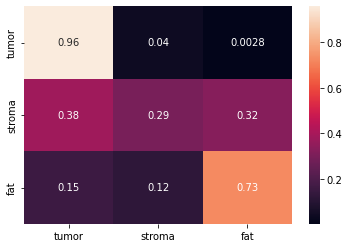

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

label_dict = {'tumor':0, 'stroma':1, 'fat':2}
labels = list(label_dict.keys())
cm = analysis.results_df['val_ConfusionMatrix'].iloc[0]

# normalize 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
df_cm
sns.heatmap(df_cm, annot=True)
plt.show()

This output directory directory also contains our model checkpoints `checkpoint_*.pt` that we'll need for inference. Now, with our trained model and model checkpoints, we can move on the next notebook!
